In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [5]:

# Load a model
model = YOLO("yolov8m.pt")  # load an official model

# Export the model
model.export(format="coreml", nms=False)
# Load the exported CoreML model
coreml_model = YOLO("yolov8m.mlpackage")


Ultralytics YOLOv8.2.79 🚀 Python-3.11.7 torch-2.4.0 CPU (Apple M3)
YOLOv8m summary (fused): 218 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs

PyTorch: starting from 'yolov8m.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (49.7 MB)

CoreML: starting export with coremltools 7.2...


Running MIL backend_mlprogram pipeline: 100%|██████████| 12/12 [00:00<00:00, 246.92 passes/s]


CoreML: export success ✅ 8.0s, saved as 'yolov8m.mlpackage' (49.6 MB)

Export complete (9.0s)
Results saved to /Users/nuhash/Desktop/other-codes/blur-Detection-Haar-Wavelet
Predict:         yolo predict task=detect model=yolov8m.mlpackage imgsz=640  
Validate:        yolo val task=detect model=yolov8m.mlpackage imgsz=640 data=coco.yaml  
Visualize:       https://netron.app
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


In [4]:

# Run inference
# results = coreml_model("./skincare-model-glowing.JPEG")
results = coreml_model("./PhotoFix_4_22_19.PNG")
result_main = model("./PhotoFix_4_22_19.PNG")
# print(results)


Loading yolov8m.mlpackage for CoreML inference...



TypeError: Ultralytics only supports inference of non-pipelined CoreML models exported with 'nms=False', but 'model=640' has an NMS pipeline created by an 'nms=True' export.

In [26]:
results[0].orig_shape

(480, 480)

In [53]:
def plot_masked_image(image, mask):
    # Resize the mask to match the image dimensions
    mask_resized = cv2.resize(mask, (image.shape[1], image.shape[0]))

    # Ensure the mask is in the same format as the image
    if len(mask_resized.shape) == 2:  # If the mask is grayscale
        mask_resized = np.expand_dims(mask_resized, axis=-1)  # Add a channel dimension
    mask_resized = np.repeat(mask_resized, 3, axis=-1)  # Repeat the mask across color channels
    # threshold the mask
    mask_resized = (mask_resized > 0.5).astype(np.uint8)
    # Create the new image
    new_image = image * mask_resized

    plt.imshow(new_image)
    plt.axis('off')  # Hide axes
    plt.show()

bus tensor([[410.9062, 483.0469, 776.2500, 507.9375]]) tensor([0.8550])


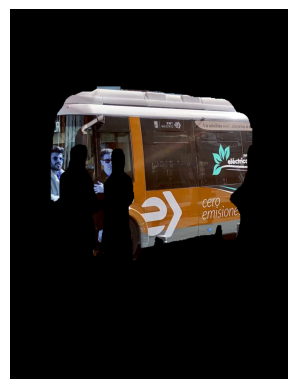

person tensor([[281.3906, 633.2344, 127.6172, 453.9375]]) tensor([0.8535])


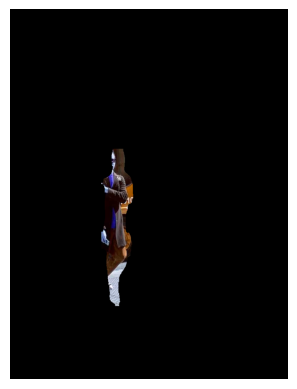

person tensor([[147.8672, 650.9531, 193.3242, 507.5156]]) tensor([0.8335])


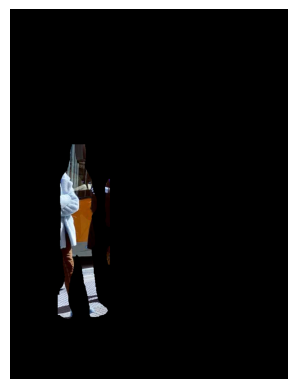

person tensor([[739.9688, 635.7656, 140.0625, 481.7812]]) tensor([0.8159])


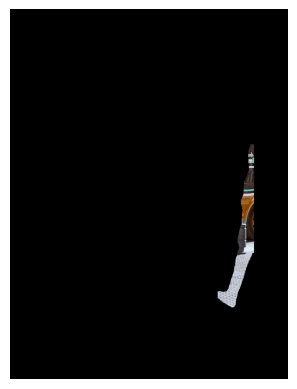

skateboard tensor([[739.1250, 852.1875, 140.0625,  59.0625]]) tensor([0.3687])


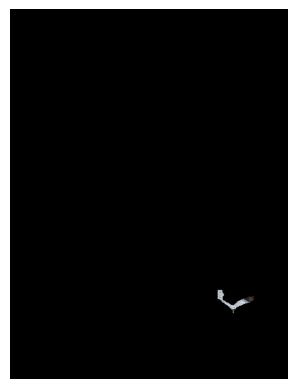

person tensor([[ 39.6562, 704.9531,  76.0430, 329.9062]]) tensor([0.2854])


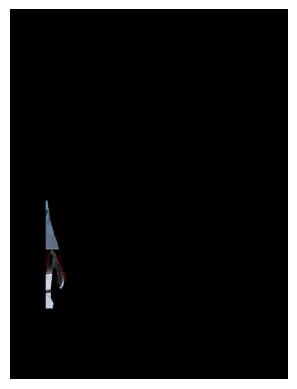

In [56]:
masks = results[0].masks
for i in range(len(masks)):
    # name 
    box = results[0].boxes[i]
    cls = box.cls.numpy()[0]
    name = results[0].names[cls]
    
    print(name, box.xywh, box.conf)
    plot_masked_image(results[0].orig_img, masks[i].data.numpy()[0])
    # plt.imshow(masks[i].data.numpy()[0], cmap='gray')
    plt.show()
# plt.imshow(results[0].masks[0].data.numpy()[0], cmap='gray')